In [48]:
import gym
import gym_maze
import time
import random
import numpy
import matplotlib.pyplot as plt

In [49]:
def select_action(Q, s, epsilon = 1):
    if(random.random() < epsilon):
        return random.randint(0, 3)
    else:
        action = 0
        for i in range(4):
            if Q[s][i] > Q[s][action]:
                action = i

        return action

In [50]:
def map_action(action):
    if action == 0:
        return 'U'
    if action == 1:
        return 'S'
    if action == 2:
        return 'E'
    if action == 3:
        return 'W'

In [51]:
def map_state(state, n):
    return state[1] * n + state[0] 

In [52]:
# Create an environment
env = gym.make("maze-random-10x10-plus-v0")
observation = env.reset()

# Define the maximum number of iterations
NUM_EPISODES = 1000000
n = 10
learning_rate = 0.01
gamma = 0.99
epsilon = 1
Q = {}

for i in range(100):
    Q[i] = [0 for j in range(4)]

state = observation
success = 0
for episode in range(NUM_EPISODES):

    mapped_state = map_state(state, n)
    action = select_action(Q, mapped_state, epsilon)
    epsilon -= (1 / NUM_EPISODES)
             
    next_state, reward, done, truncated = env.step(action)
    mapped_next_state = map_state(next_state, n)
    Q[mapped_state][action] += learning_rate * (reward + gamma * max(Q[mapped_next_state]) - Q[mapped_state][action])
    cnt += 1

    state = next_state
    
    if(episode > 900000 and mapped_next_state == 99):
        success += 1
        print(episode)

    if done or truncated:
        observation = env.reset()
        state = observation
        
env.render()
# Close the environment
env.close()

900043
900073
900123
900167
900232
900268
900312
900346
900377
900425
900469
900495
900542
900574
900634
900663
900698
900752
900779
900813
900845
900882
900916
900935
900965
901010
901067
901144
901176
901202
901256
901302
901323
901353
901384
901436
901462
901485
901521
901547
901577
901624
901678
901720
901753
901784
901838
901880
901915
901976
902009
902038
902060
902094
902121
902149
902173
902203
902256
902288
902316
902363
902425
902451
902476
902499
902547
902586
902634
902726
902764
902792
902846
902878
902903
902932
902978
903005
903032
903061
903091
903147
903175
903245
903278
903328
903354
903386
903424
903457
903490
903524
903596
903649
903702
903725
903754
903784
903816
903849
903886
903925
903991
904040
904065
904088
904133
904158
904190
904218
904248
904274
904302
904335
904374
904408
904453
904480
904517
904546
904629
904671
904721
904743
904817
904865
904905
904925
904947
904983
905067
905101
905150
905173
905210
905273
905304
905327
905360
905401
905419
905495
905520

944376
944404
944448
944493
944517
944551
944580
944622
944658
944684
944720
944760
944780
944837
944869
944891
944948
944972
945002
945030
945067
945104
945127
945163
945247
945292
945316
945347
945376
945404
945435
945463
945489
945550
945578
945615
945650
945702
945737
945759
945797
945824
945862
945910
945939
945965
946015
946053
946084
946126
946165
946273
946313
946346
946375
946416
946445
946496
946542
946569
946600
946623
946708
946800
946834
946867
946890
946917
946969
947054
947102
947140
947172
947202
947240
947266
947301
947328
947404
947426
947451
947507
947531
947556
947602
947630
947650
947692
947713
947736
947758
947785
947828
947852
947871
947896
947927
947969
948012
948042
948073
948105
948134
948178
948208
948262
948294
948320
948367
948398
948427
948455
948521
948545
948578
948610
948632
948650
948683
948722
948762
948794
948826
948863
948889
948926
948975
949061
949089
949113
949138
949159
949192
949246
949291
949344
949367
949419
949459
949499
949541
949598
949643

991215
991245
991271
991309
991362
991402
991430
991458
991482
991506
991530
991561
991589
991640
991669
991689
991714
991788
991807
991836
991877
991901
991927
991965
991996
992023
992059
992088
992122
992152
992179
992258
992298
992319
992352
992374
992451
992519
992543
992578
992609
992677
992698
992729
992761
992785
992815
992841
992864
992899
992927
992981
993007
993040
993062
993085
993124
993149
993183
993207
993231
993255
993294
993320
993352
993407
993431
993467
993494
993555
993577
993597
993661
993693
993715
993733
993763
993814
993862
993911
993938
993998
994048
994138
994184
994230
994248
994282
994316
994347
994374
994412
994475
994552
994577
994600
994635
994654
994682
994706
994730
994760
994790
994813
994847
994873
994895
994912
994950
994974
995007
995057
995107
995142
995168
995216
995249
995283
995306
995357
995407
995445
995473
995492
995521
995551
995580
995603
995629
995675
995708
995746
995776
995804
995838
995864
995901
995935
995956
995995
996035
996058
996095

In [55]:
print(NUM_EPISODES / (success * 10))

36.010082823190494


In [39]:
pi = {}
V = {}

for state in range(100):
    mx = 0
    for i in range(4):
        if(Q[state][i] > Q[state][mx]):
            mx = i
            
    pi[state] = mx
    V[state] = Q[state][mx]

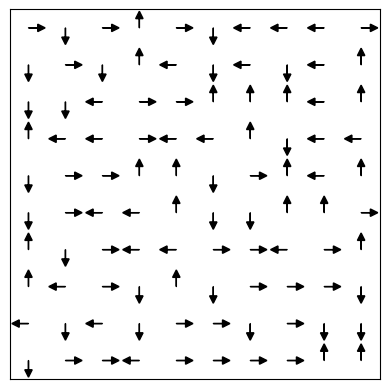

In [40]:
draw_grid(pi)

In [41]:
def draw_grid(directions, no_arrow_positions = []):
    rows = 10
    columns = 10
    cell_size = 1

    fig, ax = plt.subplots()

    for row in range(rows):
        for col in range(columns):
            index = row * columns + col
            direction = directions.get(index, None)

            if direction is not None and index not in no_arrow_positions:
                x = col * cell_size + cell_size / 2
                y = (rows - 1 - row) * cell_size + cell_size / 2

                if direction == 0:  # Upward arrow
                    ax.arrow(x, y, 0, cell_size / 4, head_width=0.2, head_length=0.2, fc='black', ec='black')
                elif direction == 2:  # Right arrow
                    ax.arrow(x, y, cell_size / 4, 0, head_width=0.2, head_length=0.2, fc='black', ec='black')
                elif direction == 1:  # Downward arrow
                    ax.arrow(x, y, 0, -cell_size / 4, head_width=0.2, head_length=0.2, fc='black', ec='black')
                elif direction == 3:  # Left arrow
                    ax.arrow(x, y, -cell_size / 4, 0, head_width=0.2, head_length=0.2, fc='black', ec='black')
            elif index in no_arrow_positions:
                c = 'black'
                if index == 47:
                    c = 'green'
                    
                ax.add_patch(plt.Rectangle((col, rows - 1 - row), 1, 1, color=c))

    ax.set_aspect('equal')
    ax.set_xlim(0, columns)
    ax.set_ylim(0, rows)
    ax.set_xticks([])
    ax.set_yticks([])

    plt.show()

In [42]:
def draw_values(data, cell_width=1, cell_height=1):
    # Prepare data for plotting
    values = [data.get(i, 0) for i in range(100)]

    grid_values = [values[i:i+10] for i in range(0, len(values), 10)]

    # Calculate the total size of the figure
    fig_width = 10 * cell_width
    fig_height = 10 * cell_height

    # Create the plot with specified figure size
    plt.figure(figsize=(fig_width, fig_height))
    plt.imshow(grid_values, cmap='viridis', interpolation='nearest')

    # Add text annotations with values formatted to 3 decimal places
    for i in range(10):
        for j in range(10):
            plt.text(j, i, '{:.3f}'.format(grid_values[i][j]), ha='center', va='center', color='black')

    # Customize plot aesthetics
    plt.title('Grid Visualization')
    plt.colorbar(label='Values')
    plt.xticks(range(10), range(10))
    plt.yticks(range(10), range(10))
    plt.xlabel('Columns')
    plt.ylabel('Rows')
    plt.grid(visible=False)
    plt.show()

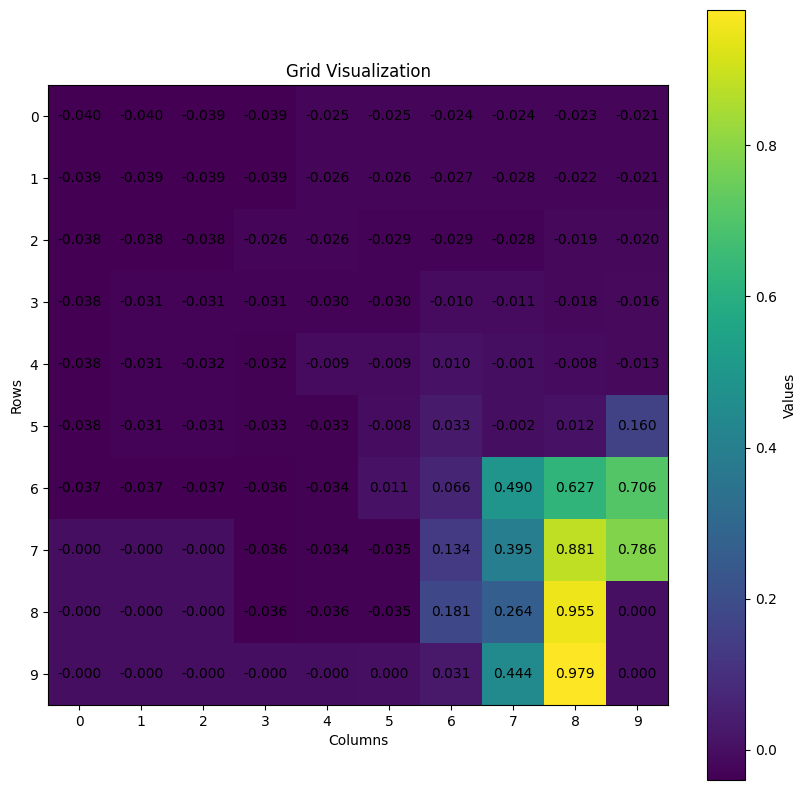

In [24]:
draw_values(V)

In [27]:
Q

{0: [0.009089821918434828,
  0.007218500206589351,
  0.010394869002907833,
  0.007626017530416557],
 1: [0.011743805369853857,
  0.014863480153388958,
  0.01370472555532047,
  0.011369310009807138],
 2: [0.013577029113041268,
  0.013535765120456086,
  0.015520473446853141,
  0.012532541325183185],
 3: [0.01736773143625815,
  0.01740595529239805,
  0.0200543503654279,
  0.014363450848275693],
 4: [0.021343131298287837,
  0.02582876161834347,
  0.02422418642345349,
  0.020481351798690813],
 5: [0.0236657463707663,
  0.024023645648095074,
  0.026871893928824744,
  0.022348445433187182],
 6: [0.029191384623971115,
  0.030153484304317253,
  0.03370522943651243,
  0.02536151286292841],
 7: [0.038366161200517425,
  0.038057903369400764,
  0.042904134237690114,
  0.03256682913337383],
 8: [0.03303418074712351,
  0.03315825469757111,
  0.03360295078264845,
  0.034993229207217105],
 9: [0.03805501872937356,
  0.03451236339223207,
  0.034390921413701064,
  0.04136318912881368],
 10: [0.0070414481